In [ ]:
import torch
import torch.nn as nn

In [ ]:
# use cuda device 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print device
print(device)

In [ ]:
# clreate a linear model for 10 class classification in pytorch
class LinearModel(nn.Module):
    # add multiple layersd  with dropout layer as well  

    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        self.linear_1 = nn.Linear(input_dim, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, output_dim)
        self.dropout = nn.Dropout(p=0.1)
        # softmax and crossentropy loss function
        self.softmax = nn.Softmax(dim=1)
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        # wrtie forward function add dropout in the last layer
        out = self.linear_1(x)
        out = self.linear_2(out)
        out = self.dropout(out)
        out = self.linear_3(out)
        out = self.softmax(out)
        return out
    
    def loss(self, y_pred, y_true):
        return self.criterion(y_pred, y_true)
    
    def accuracy(self, y_pred, y_true):
        _, predicted = torch.max(y_pred, 1)
        correct = (predicted == y_true).sum().item()
        return correct / y_true.size(0)

In [ ]:
# download mnist from pytorch
from torchvision import datasets, transforms
import numpy as np

# download the mnist dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# add the normalization as well
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# create the dataloader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test, batch_size=100, shuffle=False)

# create the model
model = LinearModel(784, 10)

# create the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# store metrics of the model training
train_loss = []
train_acc = []

# write the training loop
for epoch in range(10):
    # write thr training loop
    for i, (images, labels) in enumerate(train_loader): 
        # convert the images to 1D tensor
        images = images.reshape(-1, 28*28)
        # set the gradients to zero
        optimizer.zero_grad()
        # forward pass
        outputs = model(images)
        # calculate the loss
        loss = model.loss(outputs, labels)
        # backward pass
        loss.backward()
        # update the parameters
        optimizer.step()
        # calculate the accuracy
        acc = model.accuracy(outputs, labels)
        # print the loss only after 100 iterations
        if (i+1) % 100 == 0:
            print('Epoch: {}/{}, Step: {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch+1, 10, i+1, len(train_loader), loss.item(), acc))
        # append the loss and accuracy
        train_loss.append(loss.item())
        train_acc.append(acc)
              

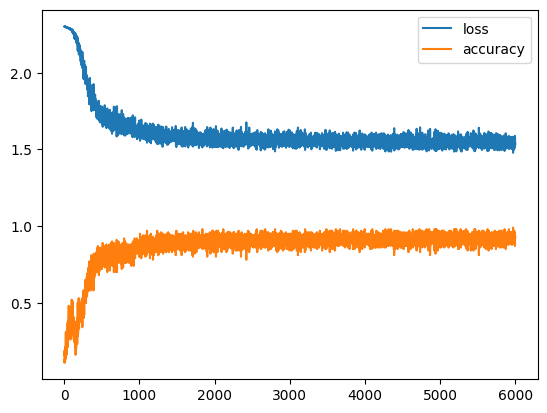

In [9]:
# plot the loss and accuracy on same plot
import matplotlib.pyplot as plt
plt.plot(train_loss, label='loss')
plt.plot(train_acc, label='accuracy')
plt.legend()
plt.show()


In [16]:
for i, image in enumerate(train_loader):
    print(type(image))
    print(image[0].shape)
    print(image[0][0].shape)
    # reshape the image to 1D tensor
    image = image[0][0].reshape(-1, 28*28)
    # forward pass
    outputs = model(image)
    # print the output shape
    print(outputs.shape)
    break


<class 'list'>
torch.Size([100, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 10])


In [39]:
# write the test loop
# write a function to enable dropout layer during test time
def enable_dropout(model):
    for m in model.modules():
        if m.__class__.__name__.startswith('Dropout'):
            m.train()

# mc dropout function add mean and variance
def mc_dropout(model, x, n_samples=10):
    with torch.no_grad():
        model.eval()
        enable_dropout(model)
        y_preds = []
        for i in range(n_samples):
            y_preds.append(model(x))    
        y_preds = torch.stack(y_preds)
        mean = torch.mean(y_preds, -1)
        variance = torch.var(y_preds, -1)
        print(mean.shape)
        print(variance.shape)
        return mean, variance

In [40]:
from tqdm import tqdm

In [41]:
img_feat = next(iter(test_loader))
ip_img = img_feat[0][0]
y_label = img_feat[1][0]

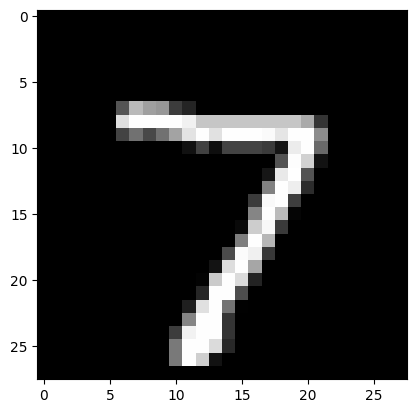

100%|██████████| 100/100 [00:00<00:00, 1672.38it/s]

torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])


In [42]:
num_exp = 100
num_samples = 10
# get one image from the test loader and assign it to x
# ip_img = next(iter(test_loader))[0][0]
# y label of the image
# plot the image
plt.imshow(ip_img[0], cmap='gray')
plt.show()
# reshape the image to 1D tensor
ip_img = ip_img.reshape(-1, 28*28)
# get mean and variance repeat the experiment num_exp times
# save the mean and variance in a list
mean_list = []
variance_list = []
for i in tqdm(range(num_exp)):
    mean, variance = mc_dropout(model, ip_img, num_samples)
    # convert the mean and variance to numpy
    mean = mean.cpu().numpy()
    variance = variance.cpu().numpy()
    # append the mean and variance to the list
    mean_list.append(mean[y_label - 1])
    variance_list.append(variance[y_label - 1])

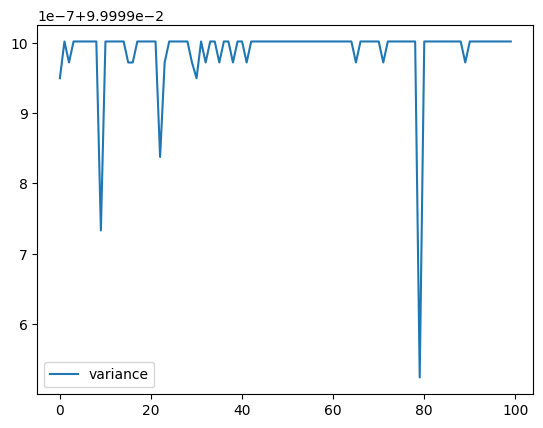

In [43]:
# plot the mean and variance
# plt.plot(mean_list, label='mean')
plt.plot(variance_list, label='variance')
plt.legend()
plt.show()

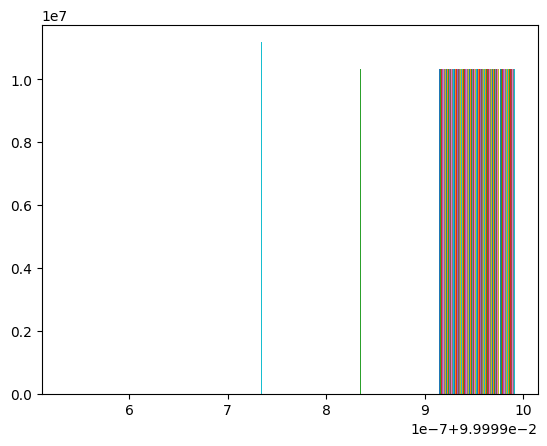

In [47]:
plt.hist(variance_list, bins=5, label='variance', density=True)
plt.show()